In [3]:
# The import statements
import math
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
# Constants for configuration
DB_PATH = './simulation-series/high-mod-series.db'
TABLE_SUMMARIES = 'SUMMARIES'
TABLE_AVERAGED_RESULTS = 'AVERAGED_RESULTS'

In [5]:
# Establish a connection to the SQLite database
conn = sqlite3.connect(DB_PATH)

# Query to retrieve the data from the database
query = f"SELECT * FROM {TABLE_SUMMARIES}"

# Read the data into a pandas DataFrame
dataframe = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
dataframe.head()

,timestamp,algorithm,assortativity,averageAuthorityScore,averageBetweennessCentrality,averageClosenessCentrality,averageCommunitySize,averageDegreeCentrality,averageEccentricity,averageEigenvectorCentrality,...,stdevNeighborsDegree,stdevNodeDegree,stdevPageRank,stdevRichClubCoefficient,transitivity,triangleProbability,graphType,objectStoragePath,numRounds,factor
0,2023-08-09-14-22-24,community_probabilities,-0.1272,0.001,0.0062,0.1449,31.2500,0.002,14.309,0.0093,...,10.7370,288.8194,0.0013,0.2997,0.0000,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,19.0,NaN
1,2023-08-09-14-16-01,community_probabilities,-0.1104,0.001,0.0061,0.1460,27.7778,0.002,11.752,0.0095,...,8.4989,288.8194,0.0012,0.2452,0.0006,0.2208,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,20.0,NaN
2,2023-08-09-14-40-37,community_probabilities,-0.0967,0.001,0.0053,0.1659,32.2581,0.002,12.103,0.0099,...,15.1625,288.8194,0.0015,0.3345,0.0057,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,34.0,NaN
3,2023-08-09-14-31-55,community_probabilities,-0.1296,0.001,0.0060,0.1489,30.3030,0.002,12.477,0.0096,...,12.5728,288.8194,0.0014,0.4092,0.0060,0.8012,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,38.0,NaN
4,2023-08-09-14-57-51,community_probabilities,-0.1300,0.001,0.0056,0.1564,27.7778,0.002,11.626,0.0116,...,11.8887,288.8194,0.0014,0.2470,0.0023,0.3861,holme-kim,high-mod-community-probabilities-25aa5dd5-dc54...,21.0,NaN


In [6]:
# Group the DataFrame by 'algorithm' and 'factor'
group_by_alg = dataframe.groupby('algorithm')

# Create a dictionary to store the smaller DataFrames
alg_df = {}

# Iterate over the groups and store them in the dictionary
for algorithm, group_df in group_by_alg:
    alg_df[algorithm] = group_df

alg_df.keys()

dict_keys(['community_probabilities', 'weighted_factor'])

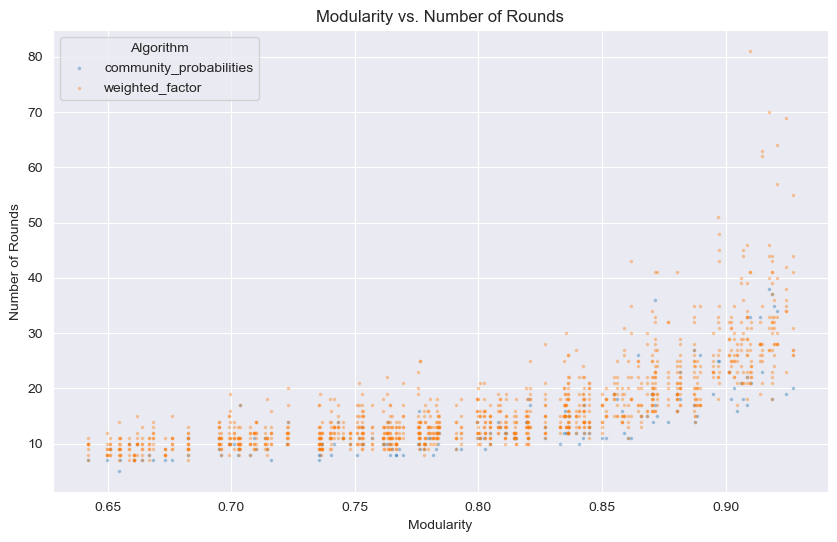

In [7]:
# Create a pretty plot using matplotlib
plt.figure(figsize=(10, 6))

for alg, df in alg_df.items():
    plt.scatter(df['modularity'], df['numRounds'], label=alg, alpha=0.3, marker='.', s=10)

plt.xlabel('Modularity')
plt.ylabel('Number of Rounds')
plt.title('Modularity vs. Number of Rounds')
plt.legend(title='Algorithm')

# Show the plot
plt.show()

In [9]:
# Group the DataFrame by 'factor'
group_by_factor = dataframe.groupby('factor')

# Create a dictionary to store the smaller DataFrames
grouped_df = {}

# Iterate over the groups and store them in the dictionary
for factor, group_df in group_by_factor:
    factor_key = f'{factor}'
    grouped_df[factor_key] = group_df
    print(f'Dataframe for weighted with factor {factor_key} has {len(group_df)} entries')

df_community_probabilities = dataframe[dataframe['algorithm'] == 'community_probabilities']
print(f'Dataframe for community_probabilities has {len(df_community_probabilities)} entries')

grouped_df.keys()

Dataframe for weighted with factor 1.25 has 160 entries
Dataframe for weighted with factor 1.5 has 160 entries
Dataframe for weighted with factor 1.75 has 160 entries
Dataframe for weighted with factor 2.0 has 160 entries
Dataframe for weighted with factor 2.25 has 160 entries
Dataframe for weighted with factor 2.5 has 160 entries
Dataframe for weighted with factor 2.75 has 160 entries
Dataframe for weighted with factor 3.0 has 160 entries
Dataframe for community_probabilities has 160 entries


dict_keys(['1.25', '1.5', '1.75', '2.0', '2.25', '2.5', '2.75', '3.0'])

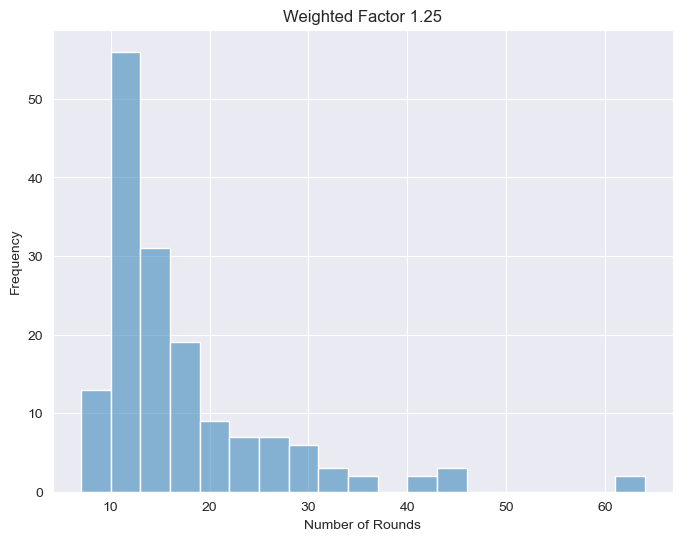

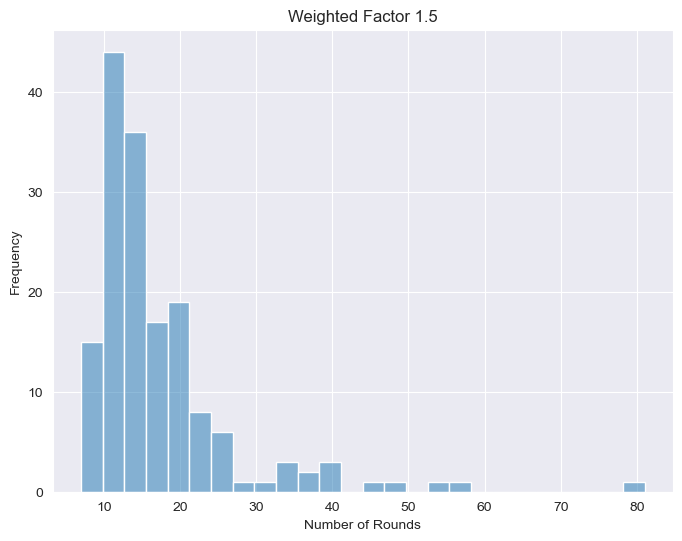

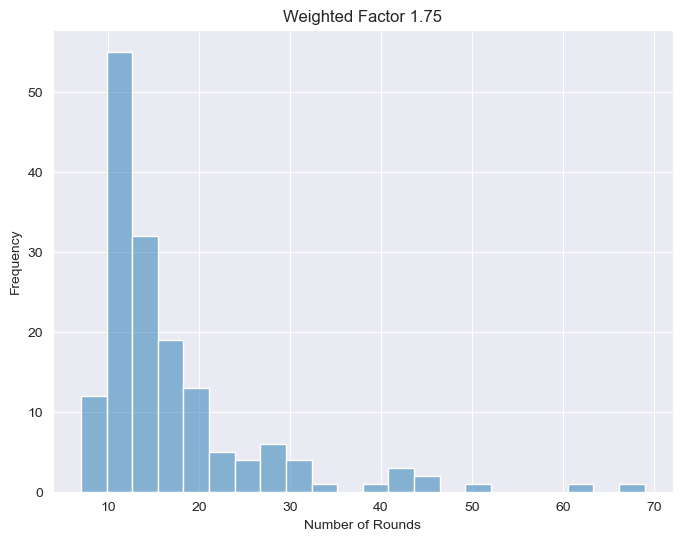

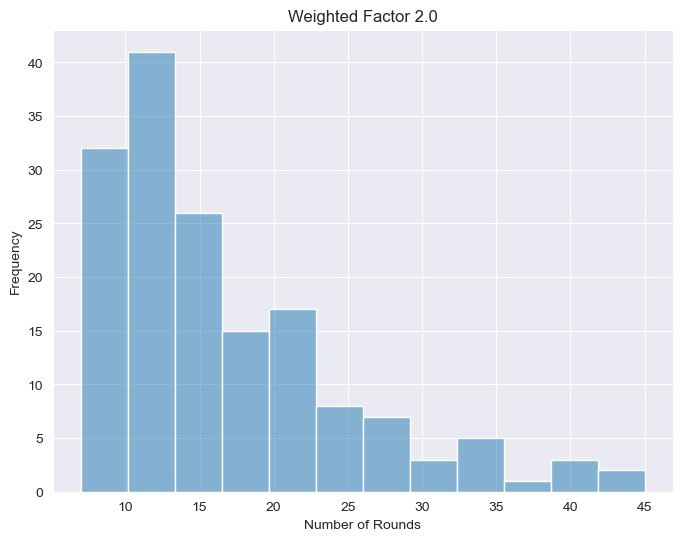

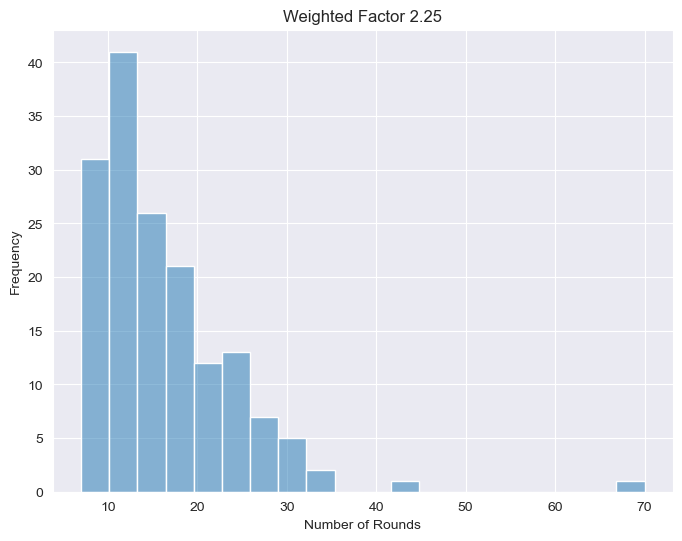

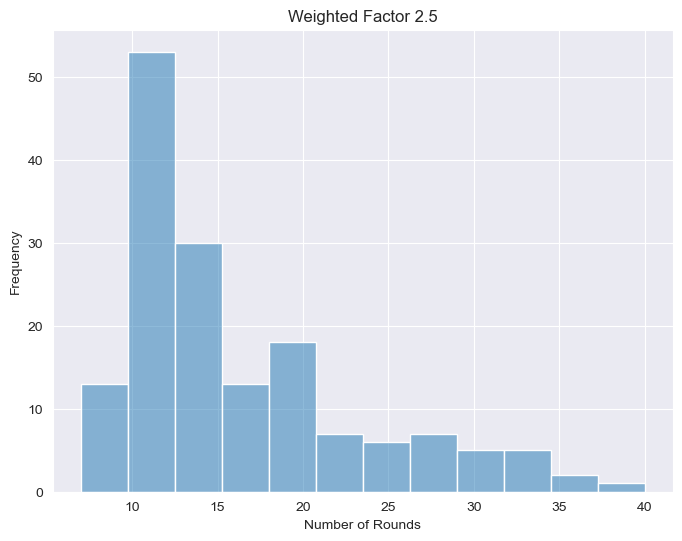

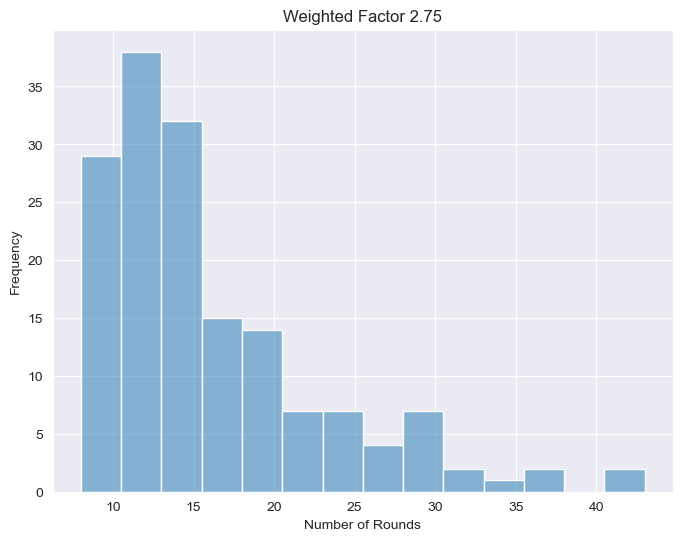

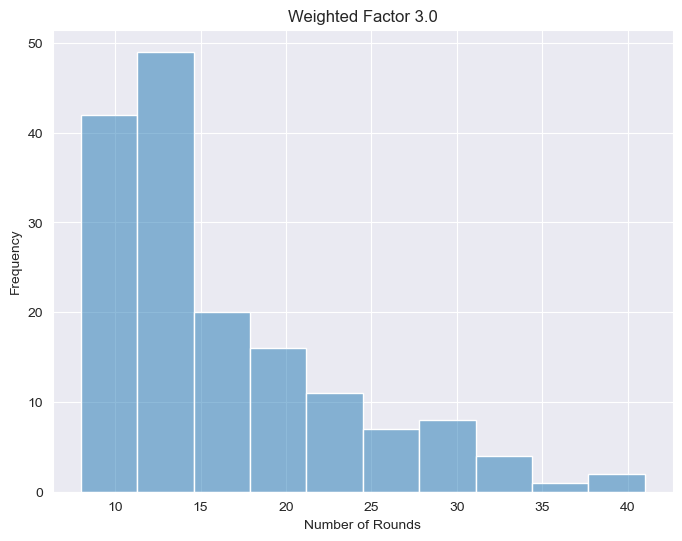

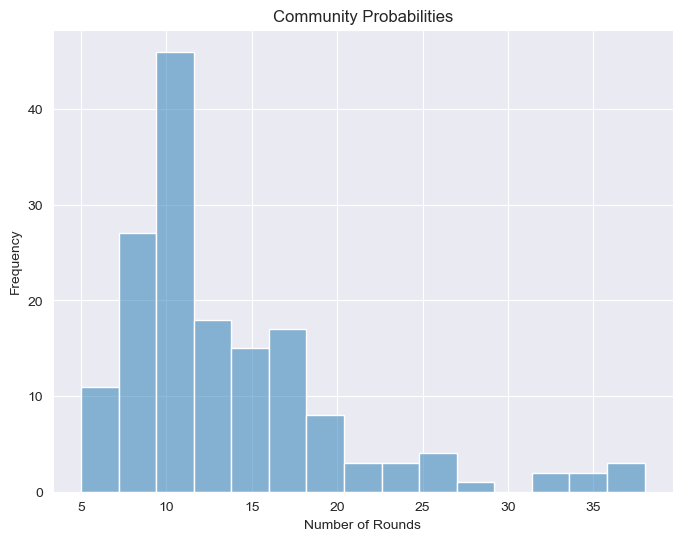

In [13]:
# Sort the grouped DataFrame keys
sorted_keys = sorted(grouped_df.keys())

# Iterate over the sorted grouped keys and create separate plots
for idx, group_key in enumerate(sorted_keys):
    # Get the DataFrame for the current key
    group_df = grouped_df[group_key]

    # Create a new plot for each rounded modularity combination
    plt.figure(figsize=(8, 6))
    sns.histplot(data=group_df, x='numRounds', alpha=0.5)
    plt.xlabel('Number of Rounds')
    plt.ylabel('Frequency')
    plt.title(f'Weighted Factor {group_key}')
    # Show the plot
    plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df_community_probabilities, x='numRounds', alpha=0.5)
plt.xlabel('Number of Rounds')
plt.ylabel('Frequency')
plt.title(f'Community Probabilities')
# Show the plot
plt.show()

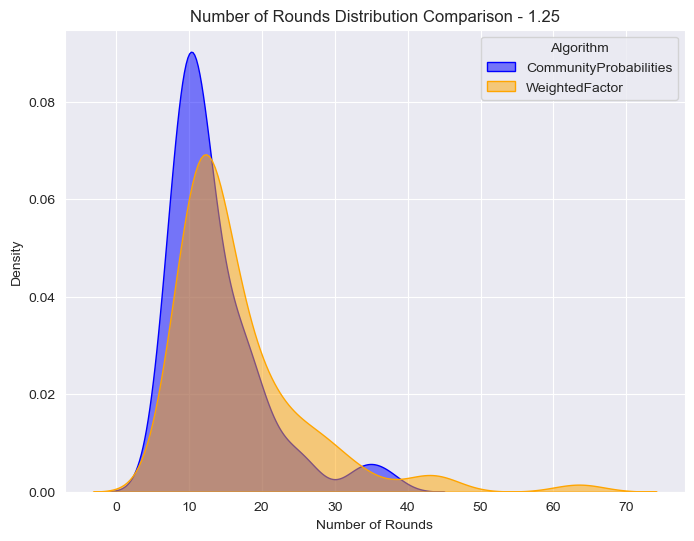

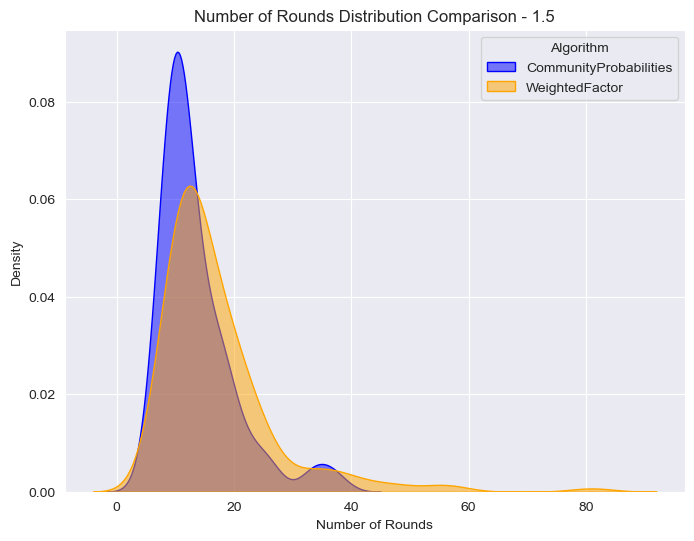

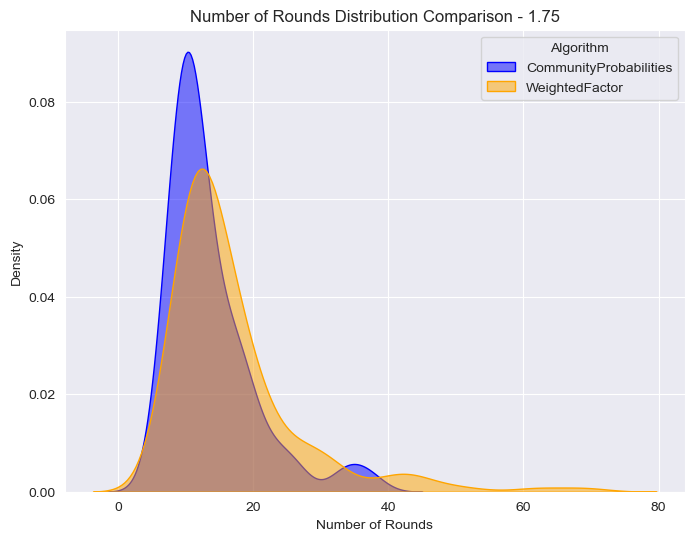

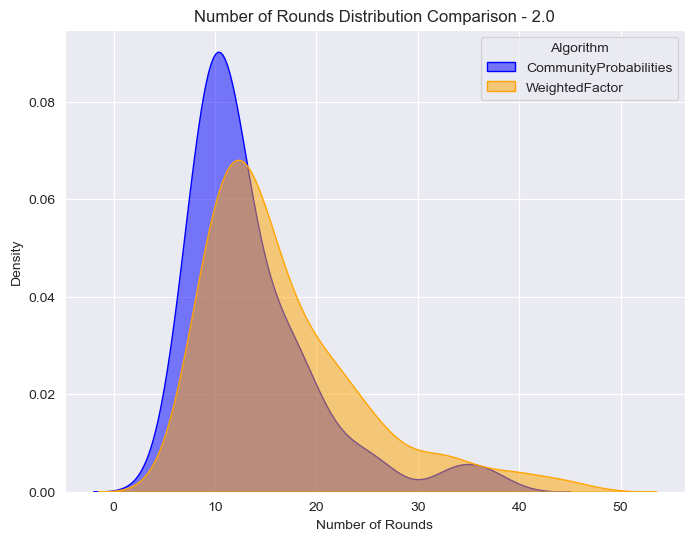

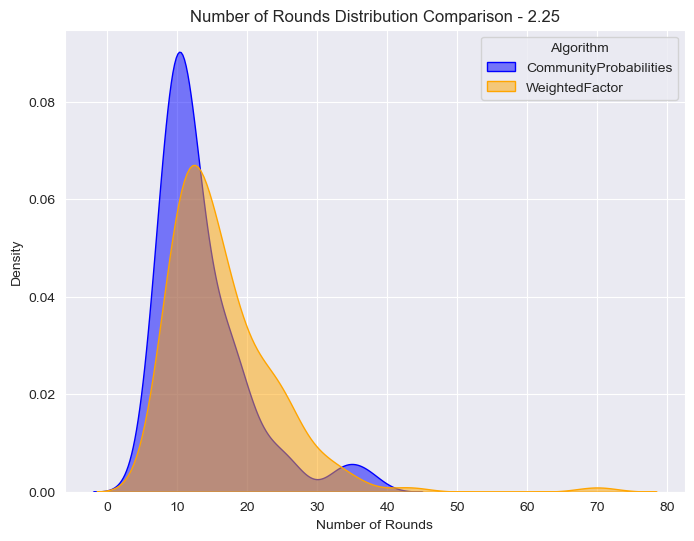

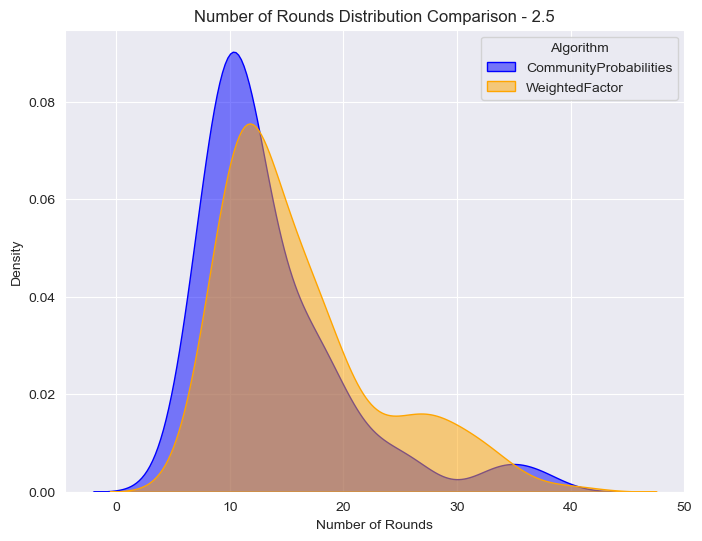

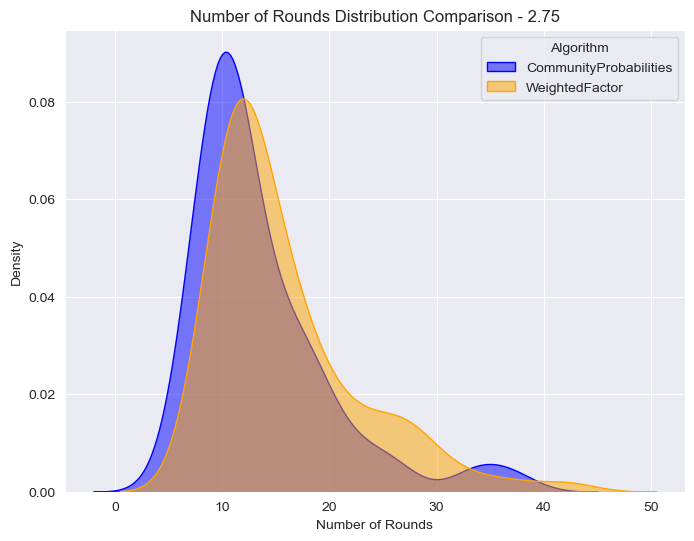

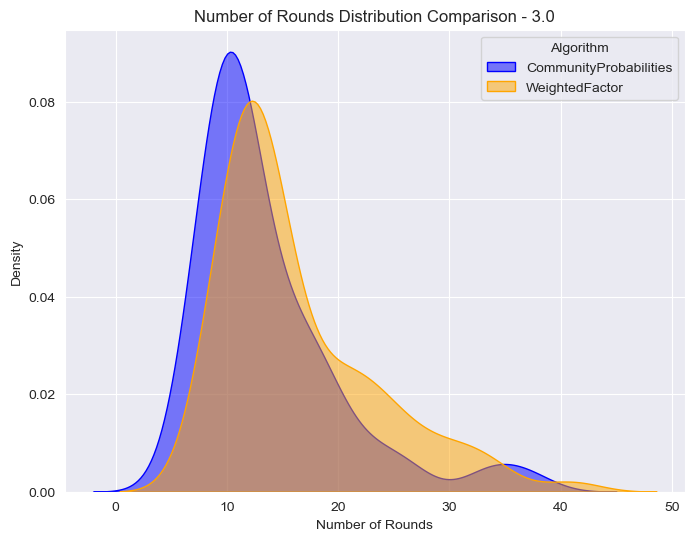

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the grouped DataFrame keys
sorted_keys = sorted(grouped_df.keys())

# Iterate over the sorted grouped keys and create separate plots
for idx, group_key in enumerate(sorted_keys):
    # Get the DataFrame for the current key
    group_df = grouped_df[group_key]

    # Split the DataFrame into default and weighted_factor data
    default_data = group_df[group_df['algorithm'] == 'default']
    weighted_factor_data = group_df[group_df['algorithm'] == 'weighted_factor']

    # Create a new plot for each rounded modularity combination
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df_community_probabilities, x='numRounds', label='CommunityProbabilities', color='blue', fill=True, alpha=0.5)
    sns.kdeplot(data=weighted_factor_data, x='numRounds', label='WeightedFactor', color='orange', fill=True, alpha=0.5)

    plt.xlabel('Number of Rounds')
    plt.ylabel('Density')
    plt.title(f'Number of Rounds Distribution Comparison - {group_key}')
    plt.legend(title='Algorithm')

    # Show the plot
    plt.show()

In [16]:
df_community_probabilities_mean = df_community_probabilities['numRounds'].mean()
df_community_probabilities_mean

13.59375

In [17]:
weighted_factor_mean = dataframe[dataframe['algorithm'] == 'weighted_factor'].groupby('factor')['numRounds'].mean()
weighted_factor_mean

factor
1.25    16.88750
1.50    17.16250
1.75    16.91875
2.00    16.80000
2.25    16.46875
2.50    16.13750
2.75    15.79375
3.00    16.27500
Name: numRounds, dtype: float64

In [23]:
algorithm_means = weighted_factor_mean.copy()
algorithm_means.index = ['wf_' + str(idx) for idx in algorithm_means.index]
algorithm_means['comm_prob'] = df_community_probabilities_mean
algorithm_means

wf_1.25      16.88750
wf_1.5       17.16250
wf_1.75      16.91875
wf_2.0       16.80000
wf_2.25      16.46875
wf_2.5       16.13750
wf_2.75      15.79375
wf_3.0       16.27500
comm_prob    13.59375
Name: numRounds, dtype: float64

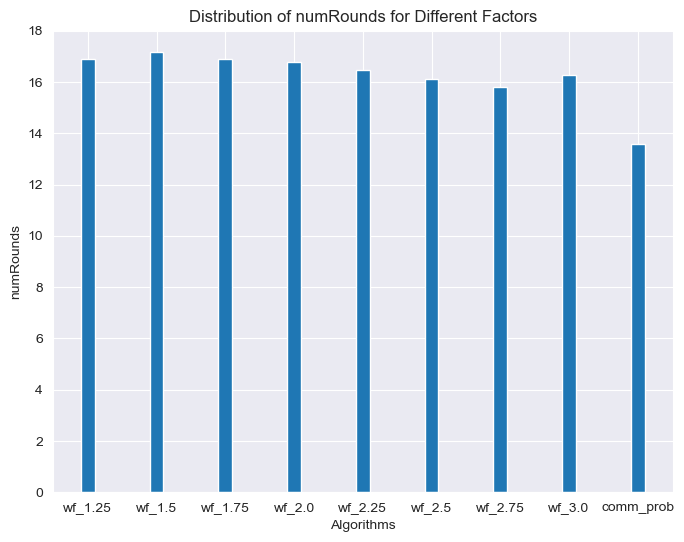

In [31]:
factors = [str(idx) for idx in algorithm_means.index]
numRounds = algorithm_means.values

plt.figure(figsize=(8, 6))
# Adjust the width of the bars here
bar_width = 0.2
plt.bar(factors, numRounds, width=bar_width)
plt.xlabel('Algorithms')
plt.ylabel('numRounds')
plt.title('Distribution of numRounds for Different Factors')

# Adjust y-axis tick values and spacing
max_num_rounds = int(max(numRounds))
plt.yticks(range(0, max_num_rounds+2 , 2))

plt.show()

In [32]:
def print_performance_difference(df1, df2, text1, text2):
    # Calculate the total number of rounds for the two dataframes
    total_rounds_df1 = df1['numRounds'].sum()
    total_rounds_df2 = df2['numRounds'].sum()

    # Calculate the percentage change
    percentage_change = ((total_rounds_df1 - total_rounds_df2) / total_rounds_df2) * 100

    print(f"The {text1} algorithm is {abs(percentage_change):.2f}% {'faster' if percentage_change < 0 else 'slower'} than the {text2} algorithm.")

In [33]:
for factor, df in grouped_df.items():
    print_performance_difference(df, df_default, f'Weighted factor ({factor})', 'default')

print_performance_difference(df_community_probabilities, df_default, 'CommunityProbabilities', 'Default')

The Weighted factor (1.25) algorithm is inf% slower than the default algorithm.
The Weighted factor (1.5) algorithm is inf% slower than the default algorithm.
The Weighted factor (1.75) algorithm is inf% slower than the default algorithm.
The Weighted factor (2.0) algorithm is inf% slower than the default algorithm.
The Weighted factor (2.25) algorithm is inf% slower than the default algorithm.
The Weighted factor (2.5) algorithm is inf% slower than the default algorithm.
The Weighted factor (2.75) algorithm is inf% slower than the default algorithm.
The Weighted factor (3.0) algorithm is inf% slower than the default algorithm.
The CommunityProbabilities algorithm is inf% slower than the Default algorithm.


C:\Users\WoodPecker\AppData\Local\Temp\ipykernel_12064\3456762199.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  percentage_change = ((total_rounds_df1 - total_rounds_df2) / total_rounds_df2) * 100


In [34]:
for factor, df in grouped_df.items():
    print_performance_difference(df_community_probabilities, df, 'CommunityProbabilities', f'WeightedFactor ({factor})')

The CommunityProbabilities algorithm is 19.50% faster than the WeightedFactor (1.25) algorithm.
The CommunityProbabilities algorithm is 20.79% faster than the WeightedFactor (1.5) algorithm.
The CommunityProbabilities algorithm is 19.65% faster than the WeightedFactor (1.75) algorithm.
The CommunityProbabilities algorithm is 19.08% faster than the WeightedFactor (2.0) algorithm.
The CommunityProbabilities algorithm is 17.46% faster than the WeightedFactor (2.25) algorithm.
The CommunityProbabilities algorithm is 15.76% faster than the WeightedFactor (2.5) algorithm.
The CommunityProbabilities algorithm is 13.93% faster than the WeightedFactor (2.75) algorithm.
The CommunityProbabilities algorithm is 16.47% faster than the WeightedFactor (3.0) algorithm.


In [35]:
def plot_correlation_matrices(dataframe, text):
    # Compute correlations between numerical columns and 'numRounds'
    correlation_matrix = dataframe.corr(numeric_only=True)

    # Filter out non-numerical columns, timestamps, and text value columns
    numerical_columns = correlation_matrix.columns[(correlation_matrix.dtypes != 'object')
                        & (correlation_matrix.columns != 'numRounds')]

    # Filter columns where correlation values are greater than 0 and not NaN or empty
    valid_numerical_columns = [col for col in numerical_columns if
                               correlation_matrix.loc['numRounds', col] > 0 or
                               correlation_matrix.loc['numRounds', col] < 0 and
                               not pd.isnull(correlation_matrix.loc['numRounds', col])]

     # Plot correlation values
    plt.figure(figsize=(15, 6))  # Increase figure size to avoid x-axis overlap
    sns.barplot(x=valid_numerical_columns, y=correlation_matrix.loc['numRounds', valid_numerical_columns])
    plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels rotation and alignment
    plt.xlabel('Columns')
    plt.ylabel('Correlation with numRounds')
    plt.title(f'Correlation of Columns with numRounds for {text}')
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Sort columns based on absolute correlation values with 'numRounds'
    sorted_columns = sorted(valid_numerical_columns,
                            key=lambda col: abs(correlation_matrix.loc['numRounds', col]),
                            reverse=True)

    # Select the top 10 columns with the highest correlation values
    top_columns = sorted_columns[:10]

    # Plot correlation values
    plt.figure(figsize=(6, 6))  # Increase figure size to avoid x-axis overlap
    sns.barplot(x=top_columns, y=correlation_matrix.loc['numRounds', top_columns])
    plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels rotation and alignment
    plt.xlabel('Columns')
    plt.ylabel('Correlation with numRounds')
    plt.title(f'Correlation of Columns with numRounds for {text}')
    plt.tight_layout()

    # Show the plot
    plt.show()

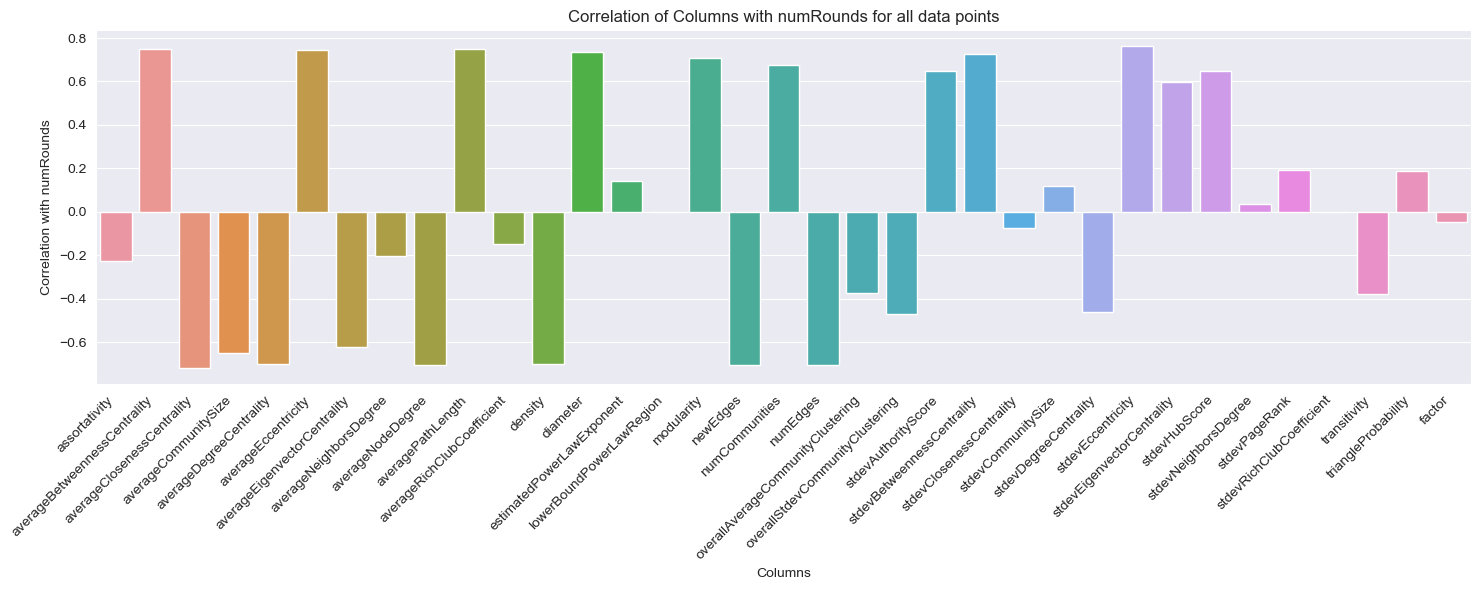

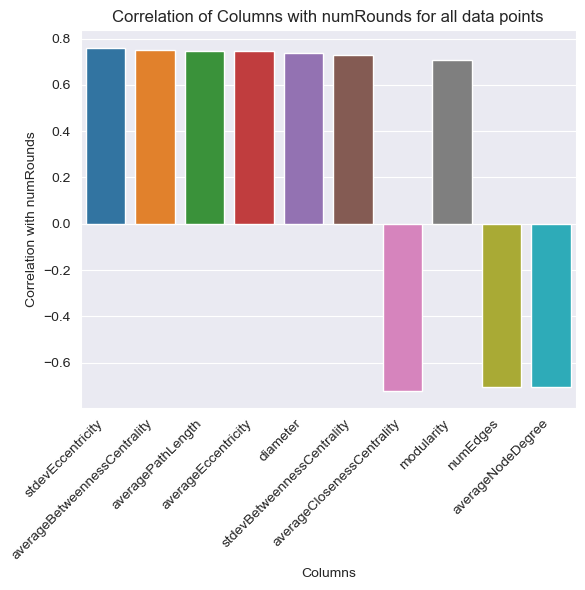

In [36]:
plot_correlation_matrices(dataframe, 'all data points')